In [1]:
# import all necessary libraries
import pandas as pd 

In [2]:
# import the data
data = pd.read_csv('Billionaire.csv')

# show first five rows
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [3]:
# explore the shape of the dataset
print('The Billionaire-Dataset has %s rows and %s coloumns.' %(data.shape[0], data.shape[1]))

The Billionaire-Dataset has 2755 rows and 7 coloumns.


In [4]:
# check for missing values 
missing_values = data.isnull().sum().sum()
print('The dataset has %s missing values!' %(missing_values))

The dataset has 79 missing values!


In [5]:
# lets check all columns for missing values 
cols = data.columns

for col in cols: 
    col_missing_values = data[col].isnull().sum()
    print(f'The column {col} has {col_missing_values} missing values!')

The column Name has 0 missing values!
The column NetWorth has 0 missing values!
The column Country has 0 missing values!
The column Source has 0 missing values!
The column Rank has 0 missing values!
The column Age has 79 missing values!
The column Industry has 0 missing values!


#### All missing values are in the Age-Column. For that reason, I decided not to do anything with the missing values. 
#### we can easily work with all the other columns for visualization without any loss of information.  

In [6]:
# now lets preprocess the data to make it easier to work with it

# Delte substrings in the 'NetWorth'-Column 
data['NetWorth'] = data['NetWorth'].str.replace("$", "")
data['NetWorth'] = data['NetWorth'].str.replace("B", "")

# change the datatype to numeric 
data['NetWorth'] = pd.to_numeric(data['NetWorth'])


/var/folders/s4/309fk8t94hn1mrnxyf1l3b580000gn/T/ipykernel_894/1891582575.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['NetWorth'] = data['NetWorth'].str.replace("$", "")


## Dive into the dataset

<AxesSubplot:ylabel='NetWorth'>

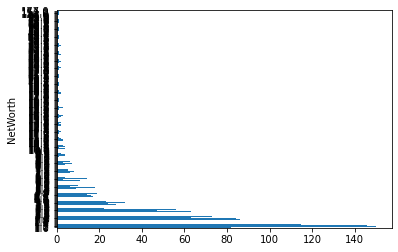

In [7]:
group_by_age = data.groupby('NetWorth').size()
group_by_age.plot.barh(x=data['Name'], y=data['NetWorth'])

<AxesSubplot:ylabel='Country'>

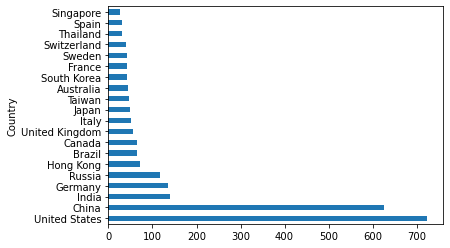

In [33]:
df_country = data.groupby('Country').size()
df_country = df_country.sort_values(ascending = False).head(20)
df_country.plot.barh()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
13,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
16,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


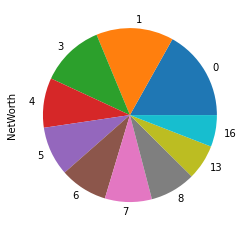

In [45]:
df_us = data[data['Country']== 'United States']
df_us = df_us.head(10)
df_us['NetWorth'].plot.pie(subplots=True)
df_us